In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/'My Drive'/'Colab Notebooks'/

/content/drive/My Drive/Colab Notebooks


In [3]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh

!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local



--2020-07-12 12:43:25--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2020-07-12 12:43:25--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing

In [4]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [5]:
%cd fastai2
!conda env create -f environment.yml
!source activate fastai2

/content/drive/My Drive/Colab Notebooks/fastai2
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [6]:
!pip install -e ".[dev]"

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/fastai2
    99% |████████████████████████████████| 753.2MB 48.2MB/s eta 0:00:01tcmalloc: large alloc 1506312192 bytes == 0x55f3c407a000 @  0x7f8b1d3b51e7 0x55f38b979804 0x55f38b9beeb4 0x55f38ba6eae2 0x55f38b9bf999 0x7f8b1a119f98 0x55f38b9a0060 0x55f38b9cdf24 0x55f38ba2dbec 0x55f38ba52eb1 0x55f38ba269a6 0x55f38ba27a11 0x55f38ba2dcc5 0x55f38ba5219a 0x55f38ba277db 0x55f38ba2dcc5 0x55f38ba5219a 0x55f38ba269a6 0x55f38ba27a11 0x55f38ba2dcc5 0x55f38ba52eb1 0x55f38ba269a6 0x55f38ba27eee 0x55f38b9a039f 0x55f38b9a4ff3 0x55f38b99fdde 0x55f38ba95095 0x55f38b9a01bb 0x55f38ba2dd3e 0x55f38ba5219a 0x55f38ba277db
    100% |████████████████████████████████| 753.2MB 1.5kB/s 
    100% |████████████████████████████████| 6.6MB 142kB/s 
    100% |████████████████████████████████| 9.9MB 106kB/s 
    100% |████████████████████████████████| 51kB 8.0MB/s 
    100% |████████████████████████████████| 829kB 567kB/s 
    100% |█████████████████████████████

In [7]:
!pip install nbdev

### **walk-note** literate programming , default_exp
The cells that have "export" (and only this code) will be used to generate the notebook [data.transforms](https://github.com/fastai/fastai2/blob/master/fastai2/data/transforms.py)

export is used to automaticall create \_\_all\_\_: this is used by python to decide what will be imported if you say import *

* In most python libraries, this dunder method is not created and this is the main reason people are saying "don’t use import \*". If there is no \_\_all\_\_, it will also import everything recursively.
* by default functions that start with underscore will be exported to the library but will no be part of \_\_all\_\_ as they are considered private

In [155]:
#default_exp data.transforms

In [156]:
#export
from fastai2.torch_basics import *
from fastai2.data.core import *
from fastai2.data.load import *
from fastai2.data.external import *

from sklearn.model_selection import train_test_split

In [26]:
from nbdev.showdoc import *

# Helper functions for processing data and basic transforms

> Functions for getting, splitting, and labeling data, as well as generic transforms

## Get, split, and label

For most data source creation we need functions to get a list of items, split them in to train/valid sets, and label them. fastai provides functions to make each of these steps easy (especially when combined with `fastai.data.blocks`).

### Get

First we'll look at functions that *get* a list of items (generally file names).

We'll use *tiny MNIST* (a subset of MNIST with just two classes, `7`s and `3`s) for our examples/tests throughout this page.

In [27]:
path = untar_data(URLs.MNIST_TINY)
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_tiny/train/7'),Path('/root/.fastai/data/mnist_tiny/train/3')]

###**walk-note**
An item can be kind of anything you like:
* For vision, it is normally a list of paths
* An item list can also be a DataFrame, connection to a DataBase, a network, a pipe… etc
* For now we are using these with paths and are looking at DataFrames later.

In [28]:
# export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [29]:
get_files??

### **walk-note** [os.walk](https://www.geeksforgeeks.org/os-walk-python/)
os.walk is very very fast, Jeremy dedicated a good amount of time into selecting the library that would provide the best performance to look for things in the fylesystems files... os.walk is capable of reading the imagenet files over 3M files in  <10 seconds

In [30]:
# export
def get_files(path, extensions=None, recurse=True, folders=None, followlinks=True):
    "Get all the files in `path` with optional `extensions`, optionally with `recurse`, only in `folders`, if specified."
    path = Path(path)
    folders=L(folders)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path, followlinks=followlinks)): # returns (dirpath, dirnames, filenames)
            if len(folders) !=0 and i==0: d[:] = [o for o in d if o in folders]
            else:                         d[:] = [o for o in d if not o.startswith('.')]
            if len(folders) !=0 and i==0 and '.' not in folders: continue
            res += _get_files(p, f, extensions)
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        res = _get_files(path, f, extensions)
    return L(res)

In [31]:
show_doc(get_files)

<h4 id="get_files" class="doc_header"><code>get_files</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>get_files</code>(**`path`**, **`extensions`**=*`None`*, **`recurse`**=*`True`*, **`folders`**=*`None`*, **`followlinks`**=*`True`*)

Get all the files in `path` with optional `extensions`, optionally with `recurse`, only in `folders`, if specified.

This is the most general way to grab a bunch of file names from disk. If you pass `extensions` (including the `.`) then returned file names are filtered by that list. Only those files directly in `path` are included, unless you pass `recurse`, in which case all child folders are also searched recursively. `folders` is an optional list of directories to limit the search to.

###**walk-note** tests
used to demostrate/ensure functionality in documentation  [implemented in fastcore](https://github.com/fastai/fastcore/blob/master/nbs/00_test.ipynb)

In [32]:
t3 = get_files(path/'train'/'3', extensions='.png', recurse=False)
t7 = get_files(path/'train'/'7', extensions='.png', recurse=False)
t  = get_files(path/'train', extensions='.png', recurse=True)
test_eq(len(t), len(t3)+len(t7))
test_eq(len(get_files(path/'train'/'3', extensions='.jpg', recurse=False)),0)
test_eq(len(t), len(get_files(path, extensions='.png', recurse=True, folders='train')))
t

(#709) [Path('/root/.fastai/data/mnist_tiny/train/7/7331.png'),Path('/root/.fastai/data/mnist_tiny/train/7/7547.png'),Path('/root/.fastai/data/mnist_tiny/train/7/8845.png'),Path('/root/.fastai/data/mnist_tiny/train/7/969.png'),Path('/root/.fastai/data/mnist_tiny/train/7/8214.png'),Path('/root/.fastai/data/mnist_tiny/train/7/8827.png'),Path('/root/.fastai/data/mnist_tiny/train/7/9588.png'),Path('/root/.fastai/data/mnist_tiny/train/7/7530.png'),Path('/root/.fastai/data/mnist_tiny/train/7/7913.png'),Path('/root/.fastai/data/mnist_tiny/train/7/8205.png')...]

###**walk-note**
Sometimes there are additional checks that are not that interesting for documentation purposes but just useful as tests. These are marked with "#hide" so that it will not be included in the docs.

In [33]:
#hide
test_eq(len(get_files(path/'train'/'3', recurse=False)),346)
test_eq(len(get_files(path, extensions='.png', recurse=True, folders=['train', 'test'])),729)
test_eq(len(get_files(path, extensions='.png', recurse=True, folders='train')),709)
test_eq(len(get_files(path, extensions='.png', recurse=True, folders='training')),0)

It's often useful to be able to create functions with customized behavior. `fastai.data` generally uses functions named as CamelCase verbs ending in `er` to create these functions. `FileGetter` is a simple example of such a function creator.

###**walk-note** Partial functions that end in "ER"

Functions named as CamelCase verbs ending in er are used for frequent type of behaviors, for example function below is used to get all files in *suf* directory, you can still specify whether it should be recursive or not.

In [34]:
#export
def FileGetter(suf='', extensions=None, recurse=True, folders=None):
    "Create `get_files` partial function that searches path suffix `suf`, only in `folders`, if specified, and passes along args"
    def _inner(o, extensions=extensions, recurse=recurse, folders=folders):
        return get_files(o/suf, extensions, recurse, folders)
    return _inner

In [35]:
fpng = FileGetter(extensions='.png', recurse=False)
test_eq(len(t7), len(fpng(path/'train'/'7')))
test_eq(len(t), len(fpng(path/'train', recurse=True)))
fpng_r = FileGetter(extensions='.png', recurse=True)
test_eq(len(t), len(fpng_r(path/'train')))

In [157]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [37]:
#export
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)

This is simply `get_files` called with a list of standard image extensions.

In [38]:
test_eq(len(t), len(get_image_files(path, recurse=True, folders='train')))

In [118]:
#export
def ImageGetter(suf='', recurse=True, folders=None):
    "Create `get_image_files` partial function that searches path suffix `suf` and passes along `kwargs`, only in `folders`, if specified."
    def _inner(o, recurse=recurse, folders=folders): return get_image_files(o/suf, recurse, folders)
    return _inner

###**walk-note**
Example below
* Our suffix is 'train' which means it only looks in this parent folder
* we use *recurse=True* because the images are inside the class folders (e.g. *train/3/image000.png* )
* we are interested only in the images for class 3

In [119]:
my_img_getter = ImageGetter('train', recurse=True, folders='3')
my_img_getter(path)

(#346) [Path('/root/.fastai/data/mnist_tiny/train/3/7134.png'),Path('/root/.fastai/data/mnist_tiny/train/3/8338.png'),Path('/root/.fastai/data/mnist_tiny/train/3/8936.png'),Path('/root/.fastai/data/mnist_tiny/train/3/8716.png'),Path('/root/.fastai/data/mnist_tiny/train/3/857.png'),Path('/root/.fastai/data/mnist_tiny/train/3/8077.png'),Path('/root/.fastai/data/mnist_tiny/train/3/9140.png'),Path('/root/.fastai/data/mnist_tiny/train/3/7881.png'),Path('/root/.fastai/data/mnist_tiny/train/3/9664.png'),Path('/root/.fastai/data/mnist_tiny/train/3/8967.png')...]

Same as `FileGetter`, but for image extensions.

In [40]:
test_eq(len(get_files(path/'train', extensions='.png', recurse=True, folders='3')),
        len(ImageGetter(   'train',                    recurse=True, folders='3')(path)))

In [41]:
#export
def get_text_files(path, recurse=True, folders=None):
    "Get text files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=['.txt'], recurse=recurse, folders=folders)

In [42]:
#export
class ItemGetter(ItemTransform):
    "Creates a proper transform that applies `itemgetter(i)` (even on a tuple)"
    _retain = False
    def __init__(self, i): self.i = i
    def encodes(self, x): return x[self.i]

In [43]:
test_eq(ItemGetter(1)((1,2,3)),  2)
test_eq(ItemGetter(1)(L(1,2,3)), 2)
test_eq(ItemGetter(1)([1,2,3]),  2)
test_eq(ItemGetter(1)(np.array([1,2,3])),  2)

###**walk-note**  [store_attr](https://fastcore.fast.ai/utils#store_attr)

```
store_attr(self, 'suff,label_delim')
```
Store params named in comma-separated nms from calling context into attrs in self.

In this example it saves two parameters in just one line. Equivalent to:
```
self.nm=nm
self.default=default
```

It finds the appopiate context (class level) in which to store the attributes

In [44]:
#export
class AttrGetter(ItemTransform):
    "Creates a proper transform that applies `attrgetter(nm)` (even on a tuple)"
    _retain = False
    def __init__(self, nm, default=None): store_attr(self, 'nm,default')
    def encodes(self, x): return getattr(x, self.nm, self.default)

In [45]:
test_eq(AttrGetter('shape')(torch.randn([4,5])), [4,5])
test_eq(AttrGetter('shape', [0])([4,5]), [0])

### Split

The next set of functions are used to *split* data into training and validation sets. The functions return two lists - a list of indices or masks for each of training and validation sets.

In [46]:
# export
def RandomSplitter(valid_pct=0.2, seed=None, **kwargs):
    "Create function that splits `items` between train/val with `valid_pct` randomly."
    def _inner(o, **kwargs):
        if seed is not None: torch.manual_seed(seed)
        rand_idx = L(int(i) for i in torch.randperm(len(o)))
        cut = int(valid_pct * len(o))
        return rand_idx[cut:],rand_idx[:cut]
    return _inner

In [47]:
src = list(range(30))
f = RandomSplitter(seed=42)
trn,val = f(src)
assert 0<len(trn)<len(src)
assert all(o not in val for o in trn)
test_eq(len(trn), len(src)-len(val))
# test random seed consistency
test_eq(f(src)[0], trn)

Use scikit-learn train_test_split. This allow to *split* items in a stratified fashion (uniformely according to the ‘labels‘ distribution)

###**walk-note** stratify
In here we just call scikit-learn test splitter to ensure the train and validation sets have the same proportion of classes.


*   No need to re-write something the works, hence only wrap-up the call to scikit-learn instead of reimplementing it.



In [48]:
# export
def TrainTestSplitter(test_size=0.2, random_state=None, stratify=None, **kwargs):
    "Split `items` into random train and test subsets using sklearn train_test_split utility."
    def _inner(o, **kwargs):
        train, valid = train_test_split(range(len(o)), test_size=test_size, random_state=random_state, stratify=stratify, **kwargs)
        return L(train), L(valid)
    return _inner

In [49]:
src = list(range(30))
labels = [0] * 20 + [1] * 10
test_size = 0.2

f = TrainTestSplitter(test_size=test_size, random_state=42, stratify=labels)
trn,val = f(src)
assert 0<len(trn)<len(src)
assert all(o not in val for o in trn)
test_eq(len(trn), len(src)-len(val))

# test random seed consistency
test_eq(f(src)[0], trn)

# test labels distribution consistency
# there should be test_size % of zeroes and ones respectively in the validation set
test_eq(len([t for t in val if t < 20]) / 20, test_size)
test_eq(len([t for t in val if t > 20]) / 10, test_size)

###**walk-note** range_of

* Custom function from fastai
* It creates the list of the indices

In [126]:
# walk-note
# Given a list, for example a list of files, src, obtain a list with the indices

a = range(len(src))
print(a)
# Notice it's not really a list yet
b = list(a)
print(b)
# now, it is a list

# we can do it in one step
range_of(src)

range(0, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [120]:
show_doc(range_of)

<h4 id="range_of" class="doc_header"><code>range_of</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/utils.py#L170" class="source_link" style="float:right">[source]</a></h4>

> <code>range_of</code>(**`x`**)

All indices of collection `x` (i.e. `list(range(len(x)))`)

In [50]:
#export
def IndexSplitter(valid_idx):
    "Split `items` so that `val_idx` are in the validation set and the others in the training set"
    def _inner(o, **kwargs):
        train_idx = np.setdiff1d(np.array(range_of(o)), np.array(valid_idx))
        return L(train_idx, use_list=True), L(valid_idx, use_list=True)
    return _inner

In [51]:
items = list(range(10))
splitter = IndexSplitter([3,7,9])
test_eq(splitter(items),[[0,1,2,4,5,6,8],[3,7,9]])

In [52]:
# export
def _grandparent_idxs(items, name):
    def _inner(items, name): return mask2idxs(Path(o).parent.parent.name == name for o in items)
    return [i for n in L(name) for i in _inner(items,n)]

###**walk-note**
With GrandparentSplitter you can look at the parent of the parent. In MNIST  that would be the path for valid or train.

In [53]:
# export
def GrandparentSplitter(train_name='train', valid_name='valid'):
    "Split `items` from the grand parent folder names (`train_name` and `valid_name`)."
    def _inner(o, **kwargs):
        return _grandparent_idxs(o, train_name),_grandparent_idxs(o, valid_name)
    return _inner

In [54]:
fnames = [path/'train/3/9932.png', path/'valid/7/7189.png', 
          path/'valid/7/7320.png', path/'train/7/9833.png',  
          path/'train/3/7666.png', path/'valid/3/925.png',
          path/'train/7/724.png', path/'valid/3/93055.png']
splitter = GrandparentSplitter()
test_eq(splitter(fnames),[[0,3,4,6],[1,2,5,7]])

In [55]:
fnames2 = fnames + [path/'test/3/4256.png', path/'test/7/2345.png', path/'valid/7/6467.png']
splitter = GrandparentSplitter(train_name=('train', 'valid'), valid_name='test')
test_eq(splitter(fnames2),[[0,3,4,6,1,2,5,7,10],[8,9]])

In [56]:
# export
def FuncSplitter(func):
    "Split `items` by result of `func` (`True` for validation, `False` for training set)."
    def _inner(o, **kwargs):
        val_idx = mask2idxs(func(o_) for o_ in o)
        return IndexSplitter(val_idx)(o)
    return _inner

In [57]:
splitter = FuncSplitter(lambda o: Path(o).parent.parent.name == 'valid')
test_eq(splitter(fnames),[[0,3,4,6],[1,2,5,7]])

###**walk-note**

MaskSplitter
* Return the indices of the items for which mask has value 1
* Return two collections, the first is a list of the indices of the items for which the mask value is False, and teh second list is the indicees of the items for which the mask is True

In [128]:
show_doc(MaskSplitter)

<h4 id="MaskSplitter" class="doc_header"><code>MaskSplitter</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>MaskSplitter</code>(**`mask`**)

Split `items` depending on the value of `mask`.

In [127]:
show_doc(mask2idxs)

<h4 id="mask2idxs" class="doc_header"><code>mask2idxs</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/foundation.py#L264" class="source_link" style="float:right">[source]</a></h4>

> <code>mask2idxs</code>(**`mask`**)

Convert bool mask or index list to index `L`

In [58]:
# export
def MaskSplitter(mask):
    "Split `items` depending on the value of `mask`."
    def _inner(o, **kwargs): return IndexSplitter(mask2idxs(mask))(o)
    return _inner

In [59]:
items = list(range(6))
splitter = MaskSplitter([True,False,False,True,False,True])
test_eq(splitter(items),[[1,2,4],[0,3,5]])

###**walk-note**

Typo below

The comment should read


```
"Split `items` depending on the return value of fname"
```



In [134]:
# export
def FileSplitter(fname):
    "Split `items` depending on the value of `mask`."
    valid = Path(fname).read().split('\n')
    def _func(x): return x.name in valid
    def _inner(o, **kwargs): return FuncSplitter(_func)(o)
    return _inner

In [140]:
fnames

[Path('/root/.fastai/data/mnist_tiny/train/3/9932.png'),
 Path('/root/.fastai/data/mnist_tiny/valid/7/7189.png'),
 Path('/root/.fastai/data/mnist_tiny/valid/7/7320.png'),
 Path('/root/.fastai/data/mnist_tiny/train/7/9833.png'),
 Path('/root/.fastai/data/mnist_tiny/train/3/7666.png'),
 Path('/root/.fastai/data/mnist_tiny/valid/3/925.png'),
 Path('/root/.fastai/data/mnist_tiny/train/7/724.png'),
 Path('/root/.fastai/data/mnist_tiny/valid/3/93055.png')]

###**walk-note** 
Read a txt file where each line is the name of a file

In [132]:
with tempfile.TemporaryDirectory() as d:
    fname = Path(d)/'valid.txt'
    fname.write('\n'.join([Path(fnames[i]).name for i in [1,3,4]]))
    splitter = FileSplitter(fname)
    test_eq(splitter(fnames),[[0,2,5,6,7],[1,3,4]])

###**walk-note**

* Notice we return the indices of items for which the column *is\_valid* is True
* In cases we have a pre-determined validation test, so you do not want to select it randomly but identify it

In [62]:
# export
def ColSplitter(col='is_valid'):
    "Split `items` (supposed to be a dataframe) by value in `col`"
    def _inner(o, **kwargs):
        assert isinstance(o, pd.DataFrame), "ColSplitter only works when your items are a pandas DataFrame"
        valid_idx = (o.iloc[:,col] if isinstance(col, int) else o[col]).values
        return IndexSplitter(mask2idxs(valid_idx))(o)
    return _inner

In [63]:
df = pd.DataFrame({'a': [0,1,2,3,4], 'b': [True,False,True,True,False]})
splits = ColSplitter('b')(df)
test_eq(splits, [[1,4], [0,2,3]])
#Works with strings or index
splits = ColSplitter(1)(df)
test_eq(splits, [[1,4], [0,2,3]])


Take a small subset of data, and the randomly select train/validation from it

In [64]:
# export
def RandomSubsetSplitter(train_sz, valid_sz, seed=None):
    "Take randoms subsets of `splits` with `train_sz` and `valid_sz`"
    assert 0 < train_sz < 1
    assert 0 < valid_sz < 1
    assert train_sz + valid_sz <= 1.

    def _inner(o, **kwargs):
        if seed is not None: torch.manual_seed(seed)
        train_len,valid_len = int(len(o)*train_sz),int(len(o)*valid_sz)
        idxs = L(int(i) for i in torch.randperm(len(o)))
        return idxs[:train_len],idxs[train_len:train_len+valid_len]
    return _inner

In [158]:
items = list(range(100))
valid_idx = list(np.arange(70,100))
splits = RandomSubsetSplitter(0.3, 0.1)(items)
test_eq(len(splits[0]), 30)
test_eq(len(splits[1]), 10)

In [164]:
valid_idx

[70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [161]:
splits[1]

(#10) [25,87,35,1,40,85,28,17,33,9]

### Label

The final set of functions is used to *label* a single item of data.

In [66]:
# export
def parent_label(o, **kwargs):
    "Label `item` with the parent folder name."
    return Path(o).parent.name

Note that `parent_label` doesn't have anything customize, so it doesn't return a function - you can just use it directly.

In [67]:
test_eq(parent_label(fnames[0]), '3')
test_eq(parent_label("fastai_dev/dev/data/mnist_tiny/train/3/9932.png"), '3')
[parent_label(o) for o in fnames]

['3', '7', '7', '7', '3', '3', '7', '3']

In [68]:
#hide
#test for MS Windows when os.path.sep is '\\' instead of '/'
test_eq(parent_label(os.path.join("fastai_dev","dev","data","mnist_tiny","train", "3", "9932.png") ), '3')

###**walk-note**

* Why create an ER function, why not rewrite it every time?
  * because it does the setup of the compile of the pattern and you only need to specify the expression

In [69]:
# export
class RegexLabeller():
    "Label `item` with regex `pat`."
    def __init__(self, pat, match=False):
        self.pat = re.compile(pat)
        self.matcher = self.pat.match if match else self.pat.search

    def __call__(self, o, **kwargs):
        res = self.matcher(str(o))
        assert res,f'Failed to find "{self.pat}" in "{o}"'
        return res.group(1)

`RegexLabeller` is a very flexible function since it handles any regex search of the stringified item. Pass `match=True` to use `re.match` (i.e. check only start of string), or `re.search` otherwise (default).

For instance, here's an example the replicates the previous `parent_label` results.

###***walk-note*** [f-strings](https://www.python.org/dev/peps/pep-0498/)

str.format()
```
'The value is {}.'.format(value)
'The value is 80.'
```
With an **f-string**, this becomes:

```
f'The value is {value}.'
'The value is 80.'
```
f-strings are string literals that are prefixed by the letter 'f' or 'F'. 'f' may be combined with 'r' or 'R', in either order, to produce raw f-string literals

Python raw string is created by prefixing a string literal with ‘r’ or ‘R’. Python raw string treats backslash (\) as a literal character. This is useful when we want to have a string that contains backslash and don’t want it to be treated as an escape character.

In [70]:
f = RegexLabeller(fr'{os.path.sep}(\d){os.path.sep}')
test_eq(f(fnames[0]), '3')
[f(o) for o in fnames]

['3', '7', '7', '7', '3', '3', '7', '3']

In [71]:
f = RegexLabeller(r'(\d*)', match=True)
test_eq(f(fnames[0].name), '9932')

###**walk-note**  [store_attr](https://fastcore.fast.ai/utils#store_attr)

```
store_attr(self, 'suff,label_delim')
```
Store params named in comma-separated nms from calling context into attrs in self.

In this example it saves two parameters in just one line. Equivalent to:
```
self.suff=suff
self.label_delim=label_delim
```



In [72]:
#export
class ColReader():
    "Read `cols` in `row` with potential `pref` and `suff`"
    def __init__(self, cols, pref='', suff='', label_delim=None):
        store_attr(self, 'suff,label_delim')
        self.pref = str(pref) + os.path.sep if isinstance(pref, Path) else pref
        self.cols = L(cols)

    def _do_one(self, r, c):
        o = r[c] if isinstance(c, int) else r[c] if c=='name' else getattr(r, c)
        if len(self.pref)==0 and len(self.suff)==0 and self.label_delim is None: return o
        if self.label_delim is None: return f'{self.pref}{o}{self.suff}'
        else: return o.split(self.label_delim) if len(o)>0 else []

    def __call__(self, o, **kwargs): 
        if len(self.cols) == 1: return self._do_one(o, self.cols[0])
        return L(self._do_one(o, c) for c in self.cols)

`cols` can be a list of column names or a list of indices (or a mix of both). If `label_delim` is passed, the result is split using it.

In [73]:
df = pd.DataFrame({'a': 'a b c d'.split(), 'b': ['1 2', '0', '', '1 2 3']})
f = ColReader('a', pref='0', suff='1')
test_eq([f(o) for o in df.itertuples()], '0a1 0b1 0c1 0d1'.split())

f = ColReader('b', label_delim=' ')
test_eq([f(o) for o in df.itertuples()], [['1', '2'], ['0'], [], ['1', '2', '3']])

df['a1'] = df['a']
f = ColReader(['a', 'a1'], pref='0', suff='1')
test_eq([f(o) for o in df.itertuples()], [L('0a1', '0a1'), L('0b1', '0b1'), L('0c1', '0c1'), L('0d1', '0d1')])

df = pd.DataFrame({'a': [L(0,1), L(2,3,4), L(5,6,7)]})
f = ColReader('a')
test_eq([f(o) for o in df.itertuples()], [L(0,1), L(2,3,4), L(5,6,7)])

df['name'] = df['a']
f = ColReader('name')
test_eq([f(df.iloc[0,:])], [L(0,1)])

## Categorize -

###**walk-note** [L lists](https://towardsdatascience.com/upgrading-python-lists-35440096ec36)

L are the fastai version of lists. It can do everything that a Python list can do and much more.

In [74]:
# walk-note
a = L([1,2,3])
a += [4,5]
a

(#5) [1,2,3,4,5]

###**walk-note** CategoryMap
* uses the fastcore object L (which is an improved collection)
* the object L has the method val2idx


In [141]:
show_doc(L.val2idx)

<h4 id="L.val2idx" class="doc_header"><code>L.val2idx</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/foundation.py#L391" class="source_link" style="float:right">[source]</a></h4>

> <code>L.val2idx</code>()

Dict from value to index

###**walk-note** o==o
* cool way to detect non-Nan objects


###**walk-note** defaultdict

* int in here tells it to use the default value of int, in this case nan is 0


In [75]:
#export
class CategoryMap(CollBase):
    "Collection of categories with the reverse mapping in `o2i`"
    def __init__(self, col, sort=True, add_na=False, strict=False):
        if is_categorical_dtype(col): 
            items = L(col.cat.categories, use_list=True)
            #Remove non-used categories while keeping order
            if strict: items = L(o for o in items if o in col.unique())
        else:
            if not hasattr(col,'unique'): col = L(col, use_list=True)
            # `o==o` is the generalized definition of non-NaN used by Pandas
            items = L(o for o in col.unique() if o==o)
            if sort: items = items.sorted()
        self.items = '#na#' + items if add_na else items
        self.o2i = defaultdict(int, self.items.val2idx()) if add_na else dict(self.items.val2idx())
    def __eq__(self,b): return all_equal(b,self)

In [76]:
t = CategoryMap([4,2,3,4])
test_eq(t, [2,3,4])
test_eq(t.o2i, {2:0,3:1,4:2})
test_fail(lambda: t.o2i['unseen label'])

In [77]:
t = CategoryMap([4,2,3,4], add_na=True)
test_eq(t, ['#na#',2,3,4])
test_eq(t.o2i, {'#na#':0,2:1,3:2,4:3})

In [78]:
t = CategoryMap(pd.Series([4,2,3,4]), sort=False)
test_eq(t, [4,2,3])
test_eq(t.o2i, {4:0,2:1,3:2})

In [79]:
col = pd.Series(pd.Categorical(['M','H','L','M'], categories=['H','M','L'], ordered=True))
t = CategoryMap(col)
test_eq(t, ['H','M','L'])
test_eq(t.o2i, {'H':0,'M':1,'L':2})

In [80]:
col = pd.Series(pd.Categorical(['M','H','M'], categories=['H','M','L'], ordered=True))
t = CategoryMap(col, strict=True)
test_eq(t, ['H','M'])
test_eq(t.o2i, {'H':0,'M':1})

###**walk-note** Categorize

* uses store_attr (explained above in another walk-note)
* notice *setup* 
  * you can pass it the vocab or *setup* generates it automatically
  
* it sets the *loss\_function* to CrossEntropyLossFlat automatically (this is how this loss is automatically set for category problem)

* it sets the default order to 1

decodes returns Category which is a tiny class that inherits from ShowTitle and this simply has a show-method.

In [150]:
show_doc(Category)

<h2 id="Category" class="doc_header"><code>class</code> <code>Category</code><a href="" class="source_link" style="float:right">[source]</a></h2>

> <code>Category</code>() :: `str`

str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

In [152]:
#export
class Category(str, ShowTitle): _show_args = {'label': 'category'}

In [153]:
# export
class Categorize(Transform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, sort=True, add_na=False):
        store_attr(self, 'add_na,sort')
        self.vocab = None if vocab is None else CategoryMap(vocab, sort=sort, add_na=add_na)

    def setups(self, dsets):
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o): return TensorCategory(self.vocab.o2i[o])
    def decodes(self, o): return Category      (self.vocab    [o])

In [165]:
cat = Categorize()
tds = Datasets(['cat', 'dog', 'cat'], tfms=[cat])
test_eq(cat.vocab, ['cat', 'dog'])
test_eq(cat('cat'), 0)
test_eq(cat.decode(1), 'dog')
test_stdout(lambda: show_at(tds,2), 'cat')

In [166]:
cat.vocab

(#2) ['cat','dog']

In [84]:
cat = Categorize(add_na=True)
tds = Datasets(['cat', 'dog', 'cat'], tfms=[cat])
test_eq(cat.vocab, ['#na#', 'cat', 'dog'])
test_eq(cat('cat'), 1)
test_eq(cat.decode(2), 'dog')
test_stdout(lambda: show_at(tds,2), 'cat')

In [85]:
cat = Categorize(vocab=['dog', 'cat'], sort=False, add_na=True)
tds = Datasets(['cat', 'dog', 'cat'], tfms=[cat])
test_eq(cat.vocab, ['#na#', 'dog', 'cat'])
test_eq(cat('dog'), 1)
test_eq(cat.decode(2), 'cat')
test_stdout(lambda: show_at(tds,2), 'cat')

## Multicategorize -

###**walk-note** Multicategorize

* loss_func = BCEWithLogitsLossFlat()
* every item has a list of labels


In [86]:
# export
class MultiCategorize(Categorize):
    "Reversible transform of multi-category strings to `vocab` id"
    loss_func,order=BCEWithLogitsLossFlat(),1
    def __init__(self, vocab=None, add_na=False):
        self.add_na = add_na
        self.vocab = None if vocab is None else CategoryMap(vocab, add_na=add_na)

    def setups(self, dsets):
        if not dsets: return
        if self.vocab is None:
            vals = set()
            for b in dsets: vals = vals.union(set(b))
            self.vocab = CategoryMap(list(vals), add_na=self.add_na)

    def encodes(self, o): return TensorMultiCategory([self.vocab.o2i[o_] for o_ in o])
    def decodes(self, o): return MultiCategory      ([self.vocab    [o_] for o_ in o])

###**walk-note**
show method for MultiCategory is a bit different as well because we have multiple things to show. Therefore we use this string joint in python sep.join(self.map(str)

In [87]:
#export
class MultiCategory(L):
    def show(self, ctx=None, sep=';', color='black', **kwargs):
        return show_title(sep.join(self.map(str)), ctx=ctx, color=color, **kwargs)

In [ ]:
###**walk-note**

In [88]:
cat = MultiCategorize()
tds = Datasets([['b', 'c'], ['a'], ['a', 'c'], []], tfms=[cat])
test_eq(tds[3][0], TensorMultiCategory([]))
test_eq(cat.vocab, ['a', 'b', 'c'])
test_eq(cat(['a', 'c']), tensor([0,2]))
test_eq(cat([]), tensor([]))
test_eq(cat.decode([1]), ['b'])
test_eq(cat.decode([0,2]), ['a', 'c'])
test_stdout(lambda: show_at(tds,2), 'a;c')

In [174]:
tds[2][0].item()

0

In [89]:
# export
class OneHotEncode(Transform):
    "One-hot encodes targets"
    order=2
    def __init__(self, c=None): self.c = c

    def setups(self, dsets):
        if self.c is None: self.c = len(L(getattr(dsets, 'vocab', None)))
        if not self.c: warn("Couldn't infer the number of classes, please pass a value for `c` at init")

    def encodes(self, o): return TensorMultiCategory(one_hot(o, self.c).float())
    def decodes(self, o): return one_hot_decode(o, None)

Works in conjunction with ` MultiCategorize` or on its own if you have one-hot encoded targets (pass a `vocab` for decoding and `do_encode=False` in this case)

In [90]:
_tfm = OneHotEncode(c=3)
test_eq(_tfm([0,2]), tensor([1.,0,1]))
test_eq(_tfm.decode(tensor([0,1,1])), [1,2])

In [91]:
tds = Datasets([['b', 'c'], ['a'], ['a', 'c'], []], [[MultiCategorize(), OneHotEncode()]])
test_eq(tds[1], [tensor([1.,0,0])])
test_eq(tds[3], [tensor([0.,0,0])])
test_eq(tds.decode([tensor([False, True, True])]), [['b','c']])
test_eq(type(tds[1][0]), TensorMultiCategory)
test_stdout(lambda: show_at(tds,2), 'a;c')

In [ ]:
['c']
[2]
[0,0,1]


In [92]:
#hide
#test with passing the vocab
tds = Datasets([['b', 'c'], ['a'], ['a', 'c'], []], [[MultiCategorize(vocab=['a', 'b', 'c']), OneHotEncode()]])
test_eq(tds[1], [tensor([1.,0,0])])
test_eq(tds[3], [tensor([0.,0,0])])
test_eq(tds.decode([tensor([False, True, True])]), [['b','c']])
test_eq(type(tds[1][0]), TensorMultiCategory)
test_stdout(lambda: show_at(tds,2), 'a;c')

In [93]:
# export
class EncodedMultiCategorize(Categorize):
    "Transform of one-hot encoded multi-category that decodes with `vocab`"
    loss_func,order=BCEWithLogitsLossFlat(),1
    def __init__(self, vocab): self.vocab,self.c = vocab,len(vocab)
    def encodes(self, o): return TensorMultiCategory(tensor(o).float())
    def decodes(self, o): return MultiCategory (one_hot_decode(o, self.vocab))

In [94]:
_tfm = EncodedMultiCategorize(vocab=['a', 'b', 'c'])
test_eq(_tfm([1,0,1]), tensor([1., 0., 1.]))
test_eq(type(_tfm([1,0,1])), TensorMultiCategory)
test_eq(_tfm.decode(tensor([False, True, True])), ['b','c'])

In [95]:
#export
class RegressionSetup(Transform):
    "Transform that floatifies targets"
    loss_func=MSELossFlat()
    def __init__(self, c=None): self.c = c
    def encodes(self, o): return tensor(o).float()
    def decodes(self, o): return TitledFloat(o) if o.ndim==0 else TitledTuple(o_.item() for o_ in o)
    def setups(self, dsets):
        if self.c is not None: return
        try: self.c = len(dsets[0]) if hasattr(dsets[0], '__len__') else 1
        except: self.c = 0

In [96]:
_tfm = RegressionSetup()
dsets = Datasets([0, 1, 2], RegressionSetup)
test_eq(dsets.c, 1)
test_eq_type(dsets[0], (tensor(0.),))

dsets = Datasets([[0, 1, 2], [3,4,5]], RegressionSetup)
test_eq(dsets.c, 3)
test_eq_type(dsets[0], (tensor([0.,1.,2.]),))

Callbacks??


* **before_batch**
* after_item
* after_batch


In [175]:
#export
def get_c(dls):
    if getattr(dls, 'c', False): return dls.c
    if getattr(getattr(dls.train, 'after_item', None), 'c', False): return dls.train.after_item.c
    if getattr(getattr(dls.train, 'after_batch', None), 'c', False): return dls.train.after_batch.c
    vocab = getattr(dls, 'vocab', [])
    if len(vocab) > 0 and is_listy(vocab[-1]): vocab = vocab[-1]
    return len(vocab)

## End-to-end dataset example with MNIST

Let's show how to use those functions to grab the mnist dataset in a `Datasets`. First we grab all the images.

In [98]:
path = untar_data(URLs.MNIST_TINY)
items = get_image_files(path)

Then we split between train and validation depending on the folder.

In [99]:
splitter = GrandparentSplitter()
splits = splitter(items)
train,valid = (items[i] for i in splits)
train[:3],valid[:3]

((#3) [Path('/root/.fastai/data/mnist_tiny/train/7/7331.png'),Path('/root/.fastai/data/mnist_tiny/train/7/7547.png'),Path('/root/.fastai/data/mnist_tiny/train/7/8845.png')],
 (#3) [Path('/root/.fastai/data/mnist_tiny/valid/7/8591.png'),Path('/root/.fastai/data/mnist_tiny/valid/7/8190.png'),Path('/root/.fastai/data/mnist_tiny/valid/7/8638.png')])

Our inputs are images that we open and convert to tensors, our targets are labeled depending on the parent directory and are categories.

###**walk-note**

* when you just provide a fucntion, it becomes a Transform that just performs that function
  * these functions would have an order=0 (default order) 

In [179]:
from PIL import Image
def open_img(fn:Path): return Image.open(fn).copy()
def img2tensor(im:Image.Image): return TensorImage(array(im)[None])

tfms = [[open_img, img2tensor],
        [parent_label, Categorize()]]
train_ds = Datasets(train, tfms)

###**walk-note**
when there's no decode() method, it returns the same value , as in the case of using functions as transforms

In [181]:
x,y = train_ds[3]
xd,yd = decode_at(train_ds,3)
test_eq(parent_label(train[3]),yd)
test_eq(array(Image.open(train[3])),xd[0].numpy())

In [182]:
show_doc(show_at)

<h4 id="show_at" class="doc_header"><code>show_at</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/core.py#L274" class="source_link" style="float:right">[source]</a></h4>

> <code>show_at</code>(**`o`**, **`idx`**, **\*\*`kwargs`**)



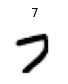

In [183]:
# walk-note , this call decode() itself, no need to call it
ax = show_at(train_ds, 3, cmap="Greys", figsize=(1,1))

In [103]:
assert ax.title.get_text() in ('3','7')
test_fig_exists(ax)

## ToTensor -

In [142]:
#export
class ToTensor(Transform):
    "Convert item to appropriate tensor class"
    order = 5

## IntToFloatTensor -

###**walk_note** 
* which encodes gets executed?

In [143]:
# export
class IntToFloatTensor(Transform):
    "Transform image to float tensor, optionally dividing by 255 (e.g. for images)."
    order = 10 #Need to run after PIL transforms on the GPU
    def __init__(self, div=255., div_mask=1): store_attr(self, 'div,div_mask')
    def encodes(self, o:TensorImage): return o.float().div_(self.div)
    def encodes(self, o:TensorMask ): return o.long() // self.div_mask
    def decodes(self, o:TensorImage): return ((o.clamp(0., 1.) * self.div).long()) if self.div else o

In [144]:
t = (TensorImage(tensor(1)),tensor(2).long(),TensorMask(tensor(3)))
tfm = IntToFloatTensor()
ft = tfm(t)
test_eq(ft, [1./255, 2, 3])
test_eq(type(ft[0]), TensorImage)
test_eq(type(ft[2]), TensorMask)
test_eq(ft[0].type(),'torch.FloatTensor')
test_eq(ft[1].type(),'torch.LongTensor')
test_eq(ft[2].type(),'torch.LongTensor')

## Normalization -

In [107]:
# export
def broadcast_vec(dim, ndim, *t, cuda=True):
    "Make a vector broadcastable over `dim` (out of `ndim` total) by prepending and appending unit axes"
    v = [1]*ndim
    v[dim] = -1
    f = to_device if cuda else noop
    return [f(tensor(o).view(*v)) for o in t]

###**walk-note**
* only one_batch is analyzed for mean,std so it might not be accurate (outlier on that batch?)
* is this batch representative?

Displays only on cpu

In [108]:
# export
@docs
class Normalize(Transform):
    "Normalize/denorm batch of `TensorImage`"
    parameters,order=L('mean', 'std'),99
    def __init__(self, mean=None, std=None, axes=(0,2,3)): self.mean,self.std,self.axes = mean,std,axes

    @classmethod
    def from_stats(cls, mean, std, dim=1, ndim=4, cuda=True): return cls(*broadcast_vec(dim, ndim, mean, std, cuda=cuda))

    def setups(self, dl:DataLoader):
        if self.mean is None or self.std is None:
            x,*_ = dl.one_batch()
            self.mean,self.std = x.mean(self.axes, keepdim=True),x.std(self.axes, keepdim=True)+1e-7

    def encodes(self, x:TensorImage): return (x-self.mean) / self.std
    def decodes(self, x:TensorImage):
        f = to_cpu if x.device.type=='cpu' else noop
        return (x*f(self.std) + f(self.mean))

    _docs=dict(encodes="Normalize batch", decodes="Denormalize batch")

In [109]:
mean,std = [0.5]*3,[0.5]*3
mean,std = broadcast_vec(1, 4, mean, std)
batch_tfms = [IntToFloatTensor, Normalize.from_stats(mean,std)]
tdl = TfmdDL(train_ds, after_batch=batch_tfms, bs=4, device=default_device())

In [110]:
x,y  = tdl.one_batch()
xd,yd = tdl.decode((x,y))

test_eq(x.type(), 'torch.cuda.FloatTensor' if default_device().type=='cuda' else 'torch.FloatTensor')
test_eq(xd.type(), 'torch.LongTensor')
test_eq(type(x), TensorImage)
test_eq(type(y), TensorCategory)
assert x.mean()<0.0
assert x.std()>0.5
assert 0<xd.float().mean()/255.<1
assert 0<xd.float().std()/255.<0.5

In [111]:
#hide
nrm = Normalize()
batch_tfms = [IntToFloatTensor(), nrm]
tdl = TfmdDL(train_ds, after_batch=batch_tfms, bs=4)
x,y  = tdl.one_batch()
test_close(x.mean(), 0.0, 1e-4)
assert x.std()>0.9, x.std()

In [112]:
#Just for visuals
from fastai2.vision.core import *

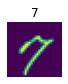

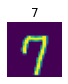

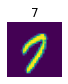

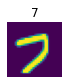

In [113]:
tdl.show_batch((x,y))

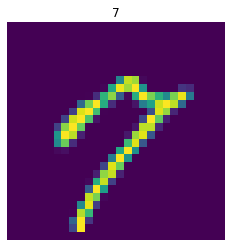

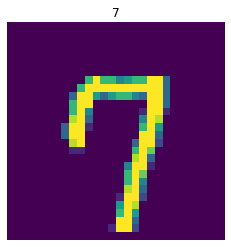

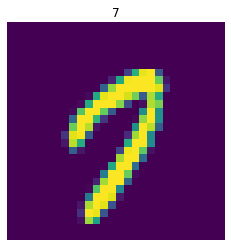

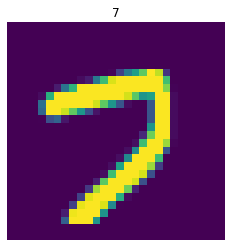

In [114]:
x,y = torch.add(x,0),torch.add(y,0) #Lose type of tensors (to emulate predictions)
test_ne(type(x), TensorImage)
tdl.show_batch((x,y), figsize=(4,4)) #Check that types are put back by dl.

In [115]:
#TODO: make the above check a proper test

## Export -

In [116]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_torch_core.ipynb.
Converted 01_layers.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 04_data.external.ipynb.
Converted 05_data.transforms.ipynb.
Converted 06_data.block.ipynb.
Converted 07_vision.core.ipynb.
Converted 08_vision.data.ipynb.
Converted 09_vision.augment.ipynb.
Converted 09b_vision.utils.ipynb.
Converted 09c_vision.widgets.ipynb.
Converted 10_tutorial.pets.ipynb.
Converted 11_vision.models.xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_callback.core.ipynb.
Converted 13a_learner.ipynb.
Converted 13b_metrics.ipynb.
Converted 14_callback.schedule.ipynb.
Converted 14a_callback.data.ipynb.
Converted 15_callback.hook.ipynb.
Converted 15a_vision.models.unet.ipynb.
Converted 16_callback.progress.ipynb.
Converted 17_callback.tracker.ipynb.
Converted 18_callback.fp16.ipynb.
Converted 18a_callback.training.ipynb.
Converted 19_callback.mixup.ipynb.
Converted 20_interpret.ipynb.
Converted 20a_distributed.ipynb.
Converted 21_vision.l